# استكشاف بيانات تصنيف الحيوانات

هذا الدفتر مخصص لاستكشاف وتحليل مجموعة بيانات Animals-10

In [9]:
# استيراد المكتبات المطلوبة
import sys
sys.path.append('../src')

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from data_processing import load_images, visualize_sample_images, analyze_data_distribution, create_data_summary_report

# إعداد matplotlib للعرض باللغة العربية
plt.rcParams['font.size'] = 12
sns.set_style("whitegrid")

## 1. تحميل البيانات

In [10]:
# تحميل البيانات
train_generator, test_generator, class_names = load_images(
    data_dir="../data/animals10",
    img_size=(128, 128),
    batch_size=32
)

print(f"تم تحميل البيانات بنجاح!")
print(f"فئات الحيوانات: {class_names}")

Found 20947 images belonging to 10 classes.
Found 5232 images belonging to 10 classes.
تم العثور على 20947 صورة تدريب
تم العثور على 5232 صورة اختبار
عدد الفئات: 10
أسماء الفئات: ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']
تم تحميل البيانات بنجاح!
فئات الحيوانات: ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']


## 2. عرض عينة من الصور

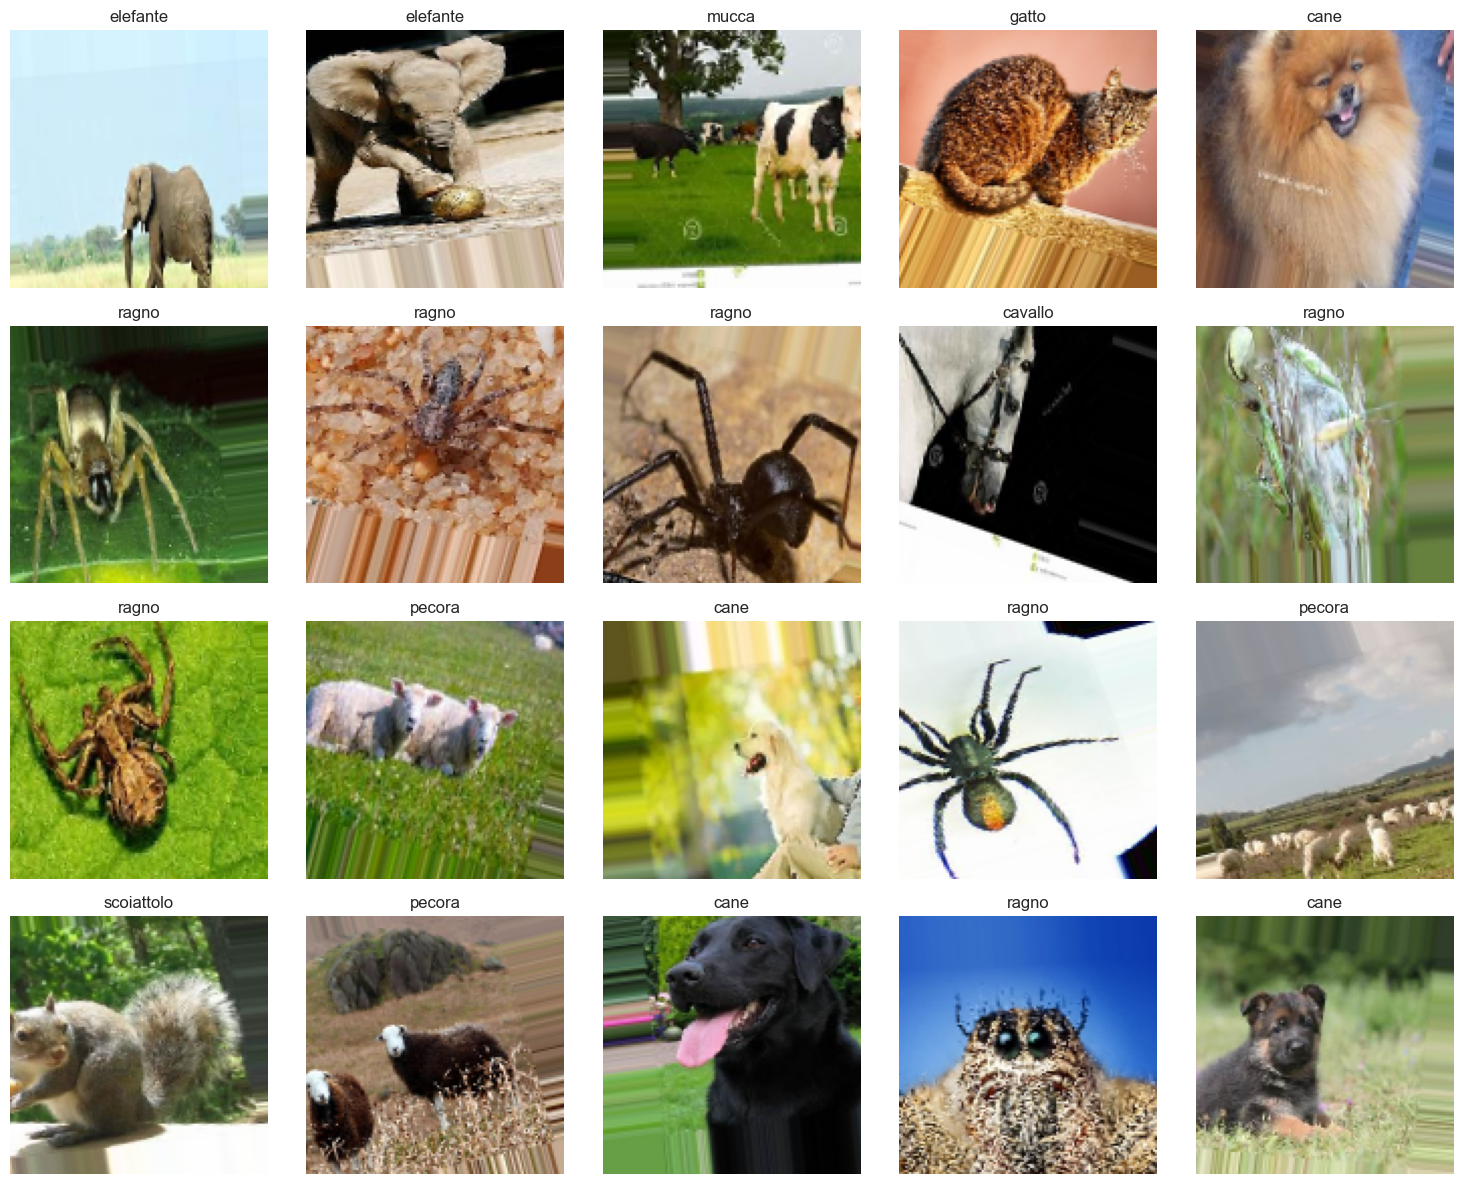

In [11]:
# عرض عينة من صور التدريب
visualize_sample_images(train_generator, class_names, sample_size=20)

## 3. تحليل توزيع البيانات

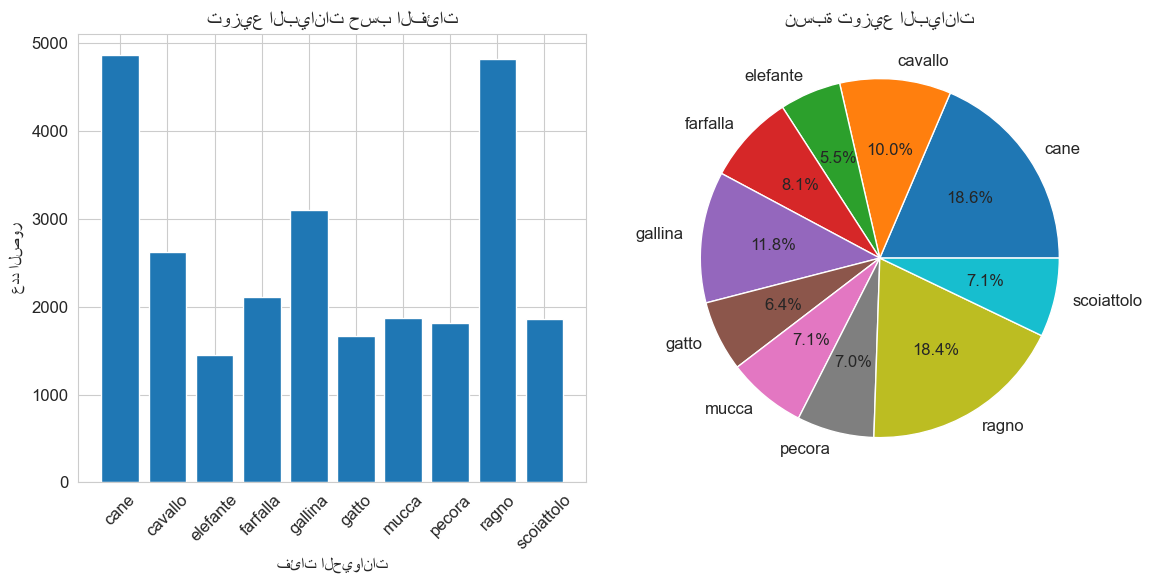

إجمالي عدد الصور: 26179
متوسط عدد الصور لكل فئة: 2617.9
cane: 4863 صورة (18.6%)
cavallo: 2623 صورة (10.0%)
elefante: 1446 صورة (5.5%)
farfalla: 2112 صورة (8.1%)
gallina: 3098 صورة (11.8%)
gatto: 1668 صورة (6.4%)
mucca: 1866 صورة (7.1%)
pecora: 1820 صورة (7.0%)
ragno: 4821 صورة (18.4%)
scoiattolo: 1862 صورة (7.1%)


In [12]:
# تحليل توزيع البيانات
analyze_data_distribution(train_generator, class_names)

## 4. تقرير شامل للبيانات

تقرير ملخص البيانات
عدد صور التدريب: 20947
عدد صور الاختبار: 5232
إجمالي الصور: 26179
عدد الفئات: 10
شكل الصورة: (128, 128, 3)
حجم الدفعة: 32

أسماء الفئات:
1. cane
2. cavallo
3. elefante
4. farfalla
5. gallina
6. gatto
7. mucca
8. pecora
9. ragno
10. scoiattolo

توزيع البيانات:


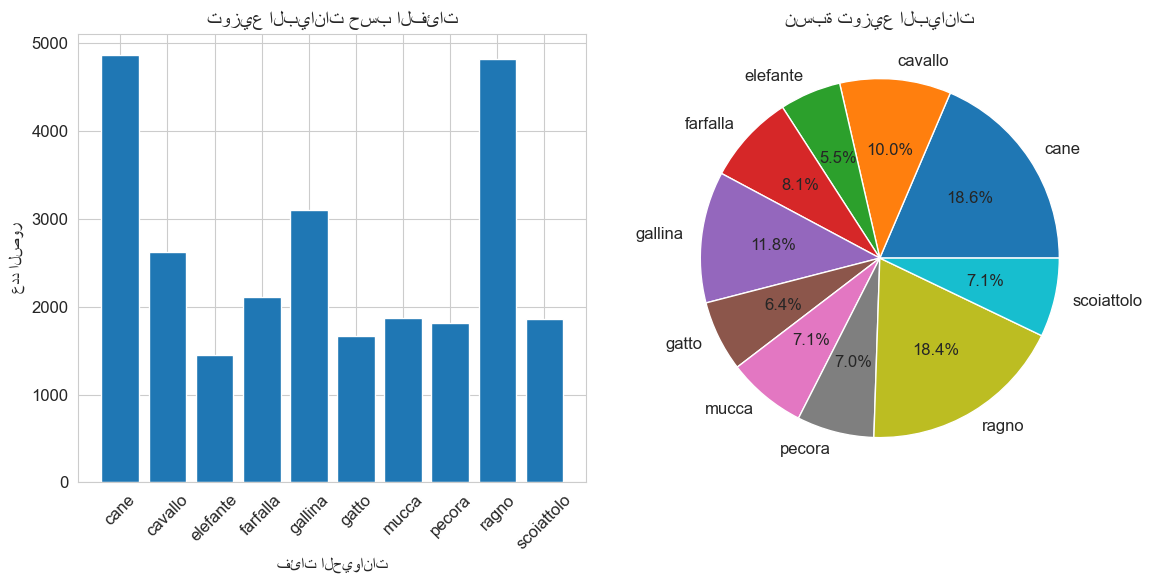

إجمالي عدد الصور: 26179
متوسط عدد الصور لكل فئة: 2617.9
cane: 4863 صورة (18.6%)
cavallo: 2623 صورة (10.0%)
elefante: 1446 صورة (5.5%)
farfalla: 2112 صورة (8.1%)
gallina: 3098 صورة (11.8%)
gatto: 1668 صورة (6.4%)
mucca: 1866 صورة (7.1%)
pecora: 1820 صورة (7.0%)
ragno: 4821 صورة (18.4%)
scoiattolo: 1862 صورة (7.1%)


In [13]:
# إنشاء تقرير شامل
create_data_summary_report(train_generator, test_generator, class_names)

In [14]:
# الحصول على دفعة من الصور لتحليل الخصائص
images, labels = next(train_generator)

print(f"شكل دفعة الصور: {images.shape}")
print(f"شكل دفعة التسميات: {labels.shape}")
print(f"نطاق قيم البكسل: [{images.min():.3f}, {images.max():.3f}]")
print(f"متوسط قيم البكسل: {images.mean():.3f}")
print(f"الانحراف المعياري: {images.std():.3f}")

شكل دفعة الصور: (32, 128, 128, 3)
شكل دفعة التسميات: (32, 10)
نطاق قيم البكسل: [0.000, 1.000]
متوسط قيم البكسل: 0.494
الانحراف المعياري: 0.300


## 6. تصور توزيع الألوان

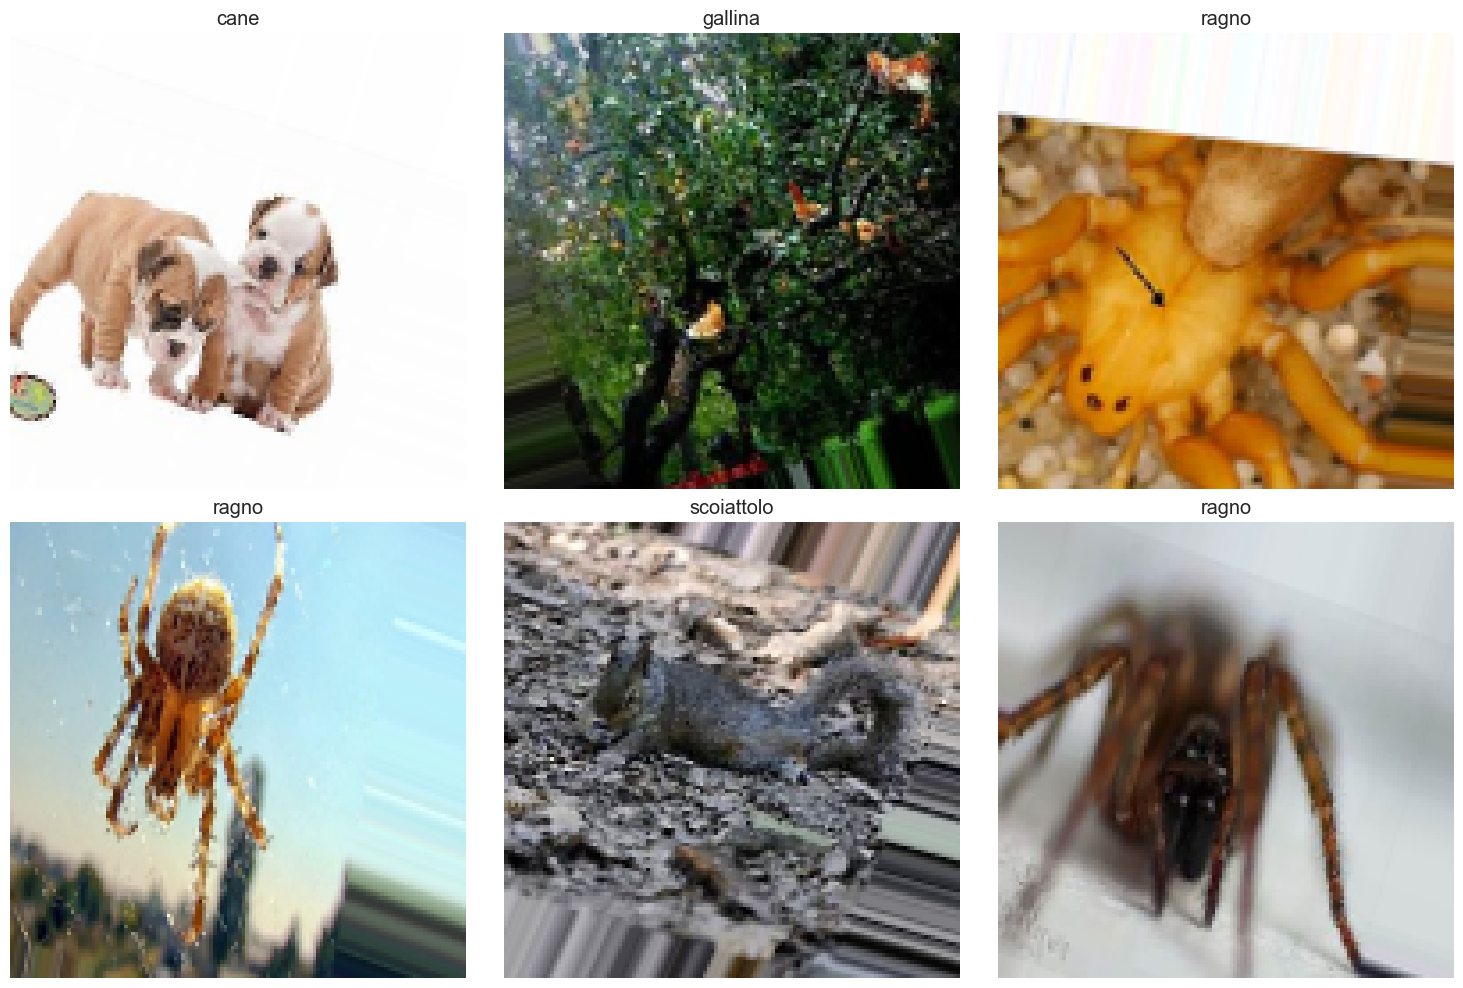

In [15]:
# تحليل توزيع الألوان في عينة من الصور
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# اختيار 6 صور عشوائية
for i in range(6):
    row = i // 3
    col = i % 3
    
    img = images[i]
    
    # عرض الصورة
    axes[row, col].imshow(img)
    
    # الحصول على اسم الفئة
    class_idx = np.argmax(labels[i])
    class_name = class_names[class_idx]
    
    axes[row, col].set_title(f'{class_name}')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

## 8. اختبار دوال التصور

اختبار رسم مصفوفة الارتباك:


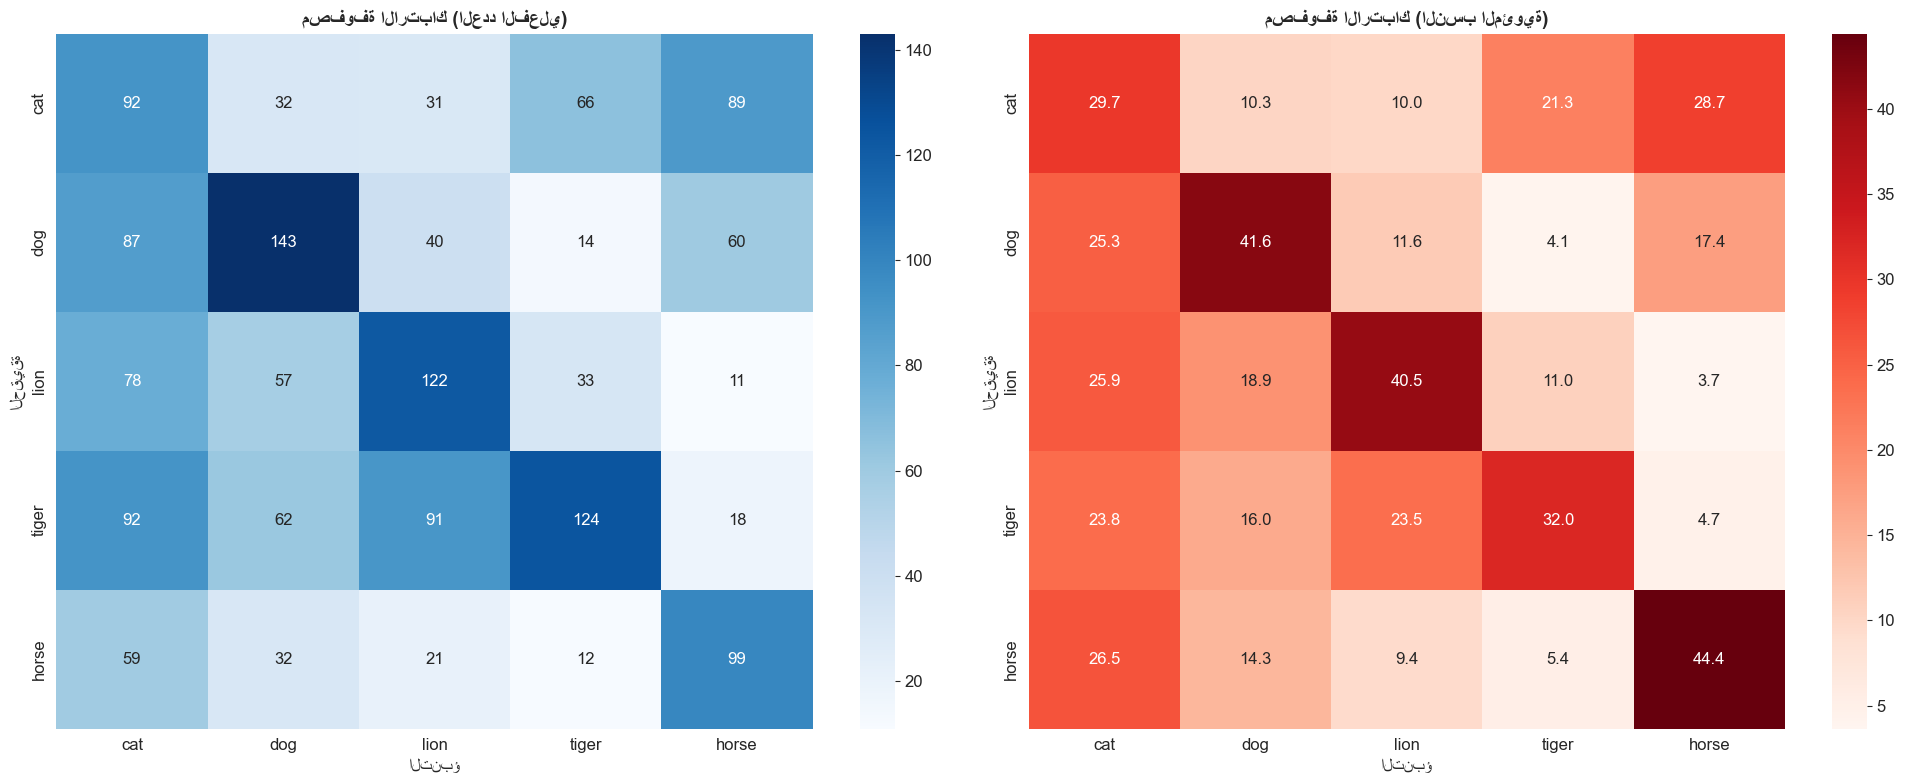

In [16]:
# استيراد دوال التصور
from visualization import plot_detailed_confusion_matrix, plot_class_performance
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# أسماء الفئات
class_names = ["cat", "dog", "lion", "tiger", "horse"]

# إنشاء مصفوفة ارتباك وهمية
dummy_cm = np.random.randint(10, 100, size=(len(class_names), len(class_names)))
np.fill_diagonal(dummy_cm, np.random.randint(80, 150, len(class_names)))

print("اختبار رسم مصفوفة الارتباك:")
plot_detailed_confusion_matrix(dummy_cm, class_names)
